# Abstract:

This study aimed to compare the performance of two machine learning models, an MLP Classifier and a Sequential Classifier, on the "diabetes.csv" dataset. The dataset was preprocessed using the StandardScaler to scale the features. 

The MLP Classifier, a multi-layer perceptron classifier, and the Sequential Classifier, a deep learning model with stacked layers, were trained on the dataset. The models were evaluated based on precision, recall, F1-score, and accuracy metrics.

The results showed that the MLP Classifier outperformed the Sequential Classifier. The MLP Classifier achieved higher precision, recall, and F1-score for both classes in the dataset. It also exhibited a higher overall accuracy, correctly classifying 83% of the instances. In contrast, the Sequential Classifier showed lower performance metrics, with precision, recall, F1-score, and accuracy values of 76%.

These findings suggest that the MLP Classifier is more effective in accurately predicting diabetes outcomes based on the given dataset. However, it is important to consider that the performance of machine learning models can vary depending on various factors, such as dataset characteristics and model configuration.

In [1]:
import tensorflow
import tensorflow as tf
from tensorflow import  keras
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import sklearn.datasets
import warnings
warnings.filterwarnings
import sklearn
import pandas as pd
import numpy as np

# To visualize the data Which help the reader to achieve quick insights.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

#To standardize the data
from sklearn.preprocessing import StandardScaler

 
## To Evaluate the Model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('diabetes (1).csv')

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
x = df.drop('Outcome',axis=1)

In [8]:
y = df['Outcome']

In [9]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train , x_test , y_train , y_test = train_test_split(x, y ,test_size=0.2, random_state=0)

In [13]:
print(x.shape, x_train.shape, x_test.shape)

(768, 8) (614, 8) (154, 8)


In [14]:
np.random.seed(0)

In [15]:
# data satandardization
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [16]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# input layer

In [17]:
model = Sequential()
model.add(Dense(8,activation='relu',input_shape=(8,)))

# Hidden layer

In [18]:
model.add(Dense(8,activation='relu'))

# output layer

In [19]:
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [21]:
model.fit(x_train,y_train,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.6708 - accuracy: 0.6124
Epoch 2/100
20/20 [==============================] - 0s 711us/step - loss: 0.6643 - accuracy: 0.6287
Epoch 3/100
20/20 [==============================] - 0s 889us/step - loss: 0.6578 - accuracy: 0.6401
Epoch 4/100
20/20 [==============================] - 0s 729us/step - loss: 0.6517 - accuracy: 0.6482
Epoch 5/100
20/20 [==============================] - 0s 931us/step - loss: 0.6467 - accuracy: 0.6368
Epoch 6/100
20/20 [==============================] - 0s 863us/step - loss: 0.6419 - accuracy: 0.6384
Epoch 7/100
20/20 [==============================] - 0s 921us/step - loss: 0.6371 - accuracy: 0.6401
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6329 - accuracy: 0.6384
Epoch 9/100
20/20 [==============================] - 0s 836us/step - loss: 0.6285 - accuracy: 0.6515
Epoch 10/100
20/20 [==============================] - 0s 969us/step - loss: 0.6242 - accuracy: 

# Training score

In [22]:
scores = model.evaluate(x_train,y_train)

20/20 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.7769


# Testing score

In [23]:
score = model.evaluate(x_test,y_test,verbose=1)
print(score)

5/5 [==============================] - 0s 5ms/step - loss: 0.4890 - accuracy: 0.7597
[0.4889860153198242, 0.7597402334213257]


In [24]:
yp = model.predict(x_test)

5/5 [==============================] - 0s 4ms/step


In [25]:
yp[:5]

array([[0.9599357 ],
       [0.1208236 ],
       [0.04412745],
       [0.6874323 ],
       [0.07273542]], dtype=float32)

In [26]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [27]:
y_pred[:5]

[1, 0, 0, 1, 0]

In [28]:
y_test[:5]

661    1
122    0
113    0
14     1
529    0
Name: Outcome, dtype: int64

In [29]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       107
           1       0.61      0.57      0.59        47

    accuracy                           0.76       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.76      0.76      0.76       154



5/5 [==============================] - 0s 4ms/step


C:\Users\RAKESH\AppData\Local\Temp\ipykernel_16372\1023004168.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


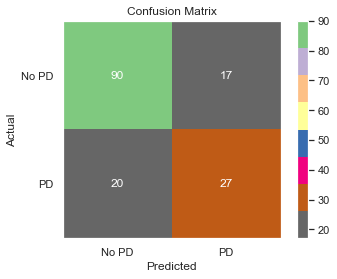

In [30]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)>0.5
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Accent_r)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['No PD', 'PD'])
plt.yticks([0, 1], ['No PD', 'PD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.grid(False)
plt.show()

In [31]:
from sklearn.metrics import RocCurveDisplay

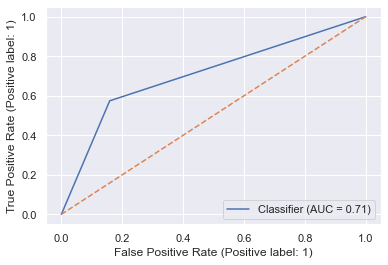

In [32]:
RocCurveDisplay.from_predictions(y_test,y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# MLPClassifier Model Building

In [33]:
from sklearn.neural_network import MLPClassifier

In [34]:
mlp = MLPClassifier(hidden_layer_sizes=(20,),activation='relu', solver='sgd', max_iter=1000, random_state=0,
                    learning_rate='adaptive', alpha=0.0001)

In [35]:
# Train the classifier on the training data
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(20,), learning_rate='adaptive', max_iter=1000,
              random_state=0, solver='sgd')

In [36]:
# Evaluate the classifier on the testing data
accuracy = mlp.score(x_test, y_test)

# Accuracy

In [37]:
print("Accuracy:", accuracy)

Accuracy: 0.8311688311688312


# Training set score

In [38]:
print('Training set score: {:.4f}'.format(mlp.score(x_train, y_train)))

Training set score: 0.7736


# Test set score

In [39]:
print('Test set score: {:.4f}'.format(mlp.score(x_test, y_test)))

Test set score: 0.8312


# Model predictions

In [40]:
y_preds = mlp.predict(x_test)

In [41]:
y_preds

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

# confusion matrix

C:\Users\RAKESH\AppData\Local\Temp\ipykernel_16372\2754788493.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


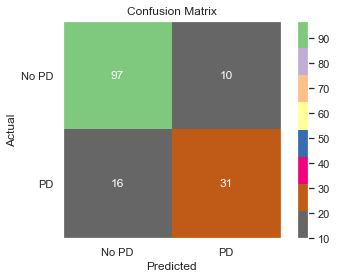

In [42]:
cm = confusion_matrix(y_test, y_preds)
plt.imshow(cm, cmap=plt.cm.Accent_r)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['No PD', 'PD'])
plt.yticks([0, 1], ['No PD', 'PD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.grid(False)
plt.show()

# classification report

In [43]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       107
           1       0.76      0.66      0.70        47

    accuracy                           0.83       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.83      0.83      0.83       154



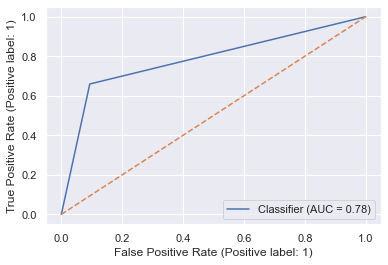

In [44]:
RocCurveDisplay.from_predictions(y_test,y_preds)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Based on the performance metrics we compaired two models, here is a comparison:

MLP Classifier:
- Precision: For class 0, the precision is 0.86, which means that 86% of the predicted positives for class 0 were actually true positives.
    * For class 1, the precision is 0.76, indicating that 76% of the predicted positives for class 1 were correct.
- Recall: For class 0, the recall is 0.91, indicating that 91% of the actual positives for class 0 were correctly identified.
    * For class 1, the recall is 0.66, meaning that 66% of the actual positives for class 1 were correctly identified.
- F1-Score: For class 0, the F1-score is 0.88, which is the harmonic mean of precision and recall.
    * For class 1, the F1-score is 0.70.
- Accuracy: The overall accuracy of the MLP Classifier is 0.83, meaning that 83% of the instances in the dataset were classified correctly.

Sequential Classifier:
- Precision: For class 0, the precision is 0.82, indicating that 82% of the predicted positives for class 0 were actually true positives.
    * For class 1, the precision is 0.61, meaning that 61% of the predicted positives for class 1 were correct.
- Recall: For class 0, the recall is 0.84, indicating that 84% of the actual positives for class 0 were correctly identified.
    * For class 1, the recall is 0.57, meaning that 57% of the actual positives for class 1 were correctly identified.
- F1-Score: For class 0, the F1-score is 0.83. For class 1, the F1-score is 0.59.
- Accuracy: The overall accuracy of the Sequential Classifier is 0.76, meaning that 76% of the instances in the dataset were classified correctly.

Based on these results, the MLP Classifier generally performs better than the Sequential Classifier.
It has higher precision, recall, and F1-score for both classes and achieves a higher overall accuracy on the dataset.
However, it's important to note that the specific results and the comparison can vary depending on the dataset,
model configuration, and other factors.